# 1 预处理操作

In [1]:
from PIL import Image,ImageEnhance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置绘图时使用的中文字体为SimHei
plt.rcParams['axes.unicode_minus']=False # 解决绘图时负号显示为方块的问题

In [2]:
# 返回自身的操作
def indentify_method1(root_path):
    image = Image.open(root_path)
    return image

# cv2_action   图像二值化 + 均衡操作
def cv2_method2(root_path):
    # 二值化操作
    rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

    gray = cv2.imdecode(np.fromfile(root_path, dtype=np.uint8), -1)
    #image = cv2.imread(root_path)
    gray = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY_INV)[1]

    # 自适应均衡操作
    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(4,4))
    res = clahe.apply(gray)
    return res

# 亮度增强 ， 颜色增强
def PIL_method3(root_path):
    # 亮度增强
    image = Image.open(root_path)
    bri = ImageEnhance.Brightness(image)
    brightness = 1.5
    image_bright = bri.enhance(brightness)
    # 颜色增强
    color = 1.5
    color_enhence = ImageEnhance.Color(image_bright)
    image_colered = color_enhence.enhance(color)
    return image_colered



In [3]:
def image_vector(image):
    vector = np.zeros(400)
    image = np.array(image)
    for i in range(20):
        for j in range(20):
            vector[20*i+j] = image[i][j]
    return vector

In [4]:
import os


def load_data(path,method):

    image_vector_list = []
    image_label_list = []

    labels_path_list = os.listdir(path)
    labels_path_list.pop(0)

    for i in range(len(labels_path_list)):
        image_label_path = os.path.join(path,labels_path_list[i])
        image_path_list = os.listdir(image_label_path)

        for image_path in image_path_list:
            image_vector1 = []
            image_path1 = os.path.join(image_label_path,image_path)
            if method == 1:
                image1 = indentify_method1(image_path1)
                image_vector1 = image_vector(image1)
                image_vector_list.append(image_vector1)
                image_label_list.append(int(labels_path_list[i]))
            elif method ==2:
                image1 = cv2_method2(image_path1)
                image_vector1 = image_vector(image1)
                image_vector_list.append(image_vector1)
                image_label_list.append(int(labels_path_list[i]))
            else:
                image1 = PIL_method3(image_path1)
                image_vector1 = image_vector(image1)
                image_vector_list.append(image_vector1)
                image_label_list.append(int(labels_path_list[i]))
    
    image_vector_list = np.array(image_vector_list)
    image_label_list = np.array(image_label_list)
    print(image_vector_list.shape)
    print(image_label_list.shape)
    return image_vector_list,image_label_list

X_train1, y_train1 = load_data(path=r'data\train',method=1)
X_test1, y_test1 = load_data(path=r'data\test',method=1)



X_train3, y_train3 = load_data(path=r'data\train',method=3)
X_test3, y_test3 = load_data(path=r'data\test',method=3)

(12706, 400)
(12706,)
(4665, 400)
(4665,)
(12706, 400)
(12706,)
(4665, 400)
(4665,)


In [5]:
X_train2, y_train2 = load_data(path=r'data\train',method=2)
X_test2, y_test2 = load_data(path=r'data\test',method=2)

(12706, 400)
(12706,)
(4665, 400)
(4665,)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# 对数据进标准化预处理
X_train_std1 = scaler.fit_transform(X_train1)
X_test_std1 = scaler.fit_transform(X_test1)

# 对数据进标准化预处理
X_train_std2 = scaler.fit_transform(X_train2)
X_test_std2 = scaler.fit_transform(X_test2)

# 对数据进标准化预处理
X_train_std3 = scaler.fit_transform(X_train3)
X_test_std3 = scaler.fit_transform(X_test3)

# 2 数据处理操作


In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # 导入线性判别分析算法
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor # 导入K近邻分类器和回归器
# 交叉验证
parms = {
    "n_neighbors":[1,2,3,4,5,6,7,8,9],
    "weights":['uniform','distance'],
    "p":[1,2]
}
knn=KNeighborsClassifier()
grid_search = GridSearchCV(knn,parms,cv=5,scoring="accuracy",verbose=100,n_jobs=1)
grid_search.fit(X_train_std1,y_train1)
label = grid_search.predict(X_test_std1)
print(grid_search.best_score_,grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START n_neighbors=1, p=1, weights=uniform........................
[CV 1/5; 1/36] END n_neighbors=1, p=1, weights=uniform;, score=0.954 total time=   0.7s
[CV 2/5; 1/36] START n_neighbors=1, p=1, weights=uniform........................
[CV 2/5; 1/36] END n_neighbors=1, p=1, weights=uniform;, score=0.938 total time=   0.6s
[CV 3/5; 1/36] START n_neighbors=1, p=1, weights=uniform........................
[CV 3/5; 1/36] END n_neighbors=1, p=1, weights=uniform;, score=0.948 total time=   0.5s
[CV 4/5; 1/36] START n_neighbors=1, p=1, weights=uniform........................
[CV 4/5; 1/36] END n_neighbors=1, p=1, weights=uniform;, score=0.961 total time=   0.5s
[CV 5/5; 1/36] START n_neighbors=1, p=1, weights=uniform........................
[CV 5/5; 1/36] END n_neighbors=1, p=1, weights=uniform;, score=0.958 total time=   0.6s
[CV 1/5; 2/36] START n_neighbors=1, p=1, weights=distance.......................
[CV 1/5; 2/3

In [8]:
# 0.9519122581635994 {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
# 比较增强效果
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=2,weights='distance',p=1)
knn.fit(X_train_std1,y_train1)
label = knn.predict(X_test_std1)
acc=accuracy_score(y_test1,label)
print(acc)

0.7133976420150053


In [9]:
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=2,weights='distance',p=1)
knn.fit(X_train_std2,y_train2)
label = knn.predict(X_test_std2)
acc=accuracy_score(y_test2,label)
print(acc)

0.7541264737406217


In [10]:
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=2,weights='distance',p=1)
knn.fit(X_train_std3,y_train3)
label = knn.predict(X_test_std3)
acc=accuracy_score(y_test3,label)
print(acc)

0.7419078242229368


In [11]:
from imblearn.over_sampling import SMOTE 
oversample = SMOTE(k_neighbors=2) 
X_train_smote, y_train_smote = oversample.fit_resample(X_train_std3, y_train3) 

X_test_smote, y_test_smote = oversample.fit_resample(X_test_std3, y_test3)
print("SMOTE之后图片向量的维度:",X_train_smote.shape , "SMOTE之后标签值的维度:",y_train_smote.shape)
print("SMOTE之后图片向量的维度:",X_test_smote.shape , "SMOTE之后标签值的维度:",y_test_smote.shape)

knn=KNeighborsClassifier(n_neighbors=2,weights='distance',p=1)
knn.fit(X_train_smote,y_train_smote)
label = knn.predict(X_test_smote)
acc=accuracy_score(y_test_smote,label)
print(acc)


SMOTE之后图片向量的维度: (63245, 400) SMOTE之后标签值的维度: (63245,)
SMOTE之后图片向量的维度: (28032, 400) SMOTE之后标签值的维度: (28032,)
0.7971247146118722


# 3 可视化分析

In [12]:
def draw(x,y,name,xlabel,ylabel,title):
    plt.plot(x,y,label=name)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    

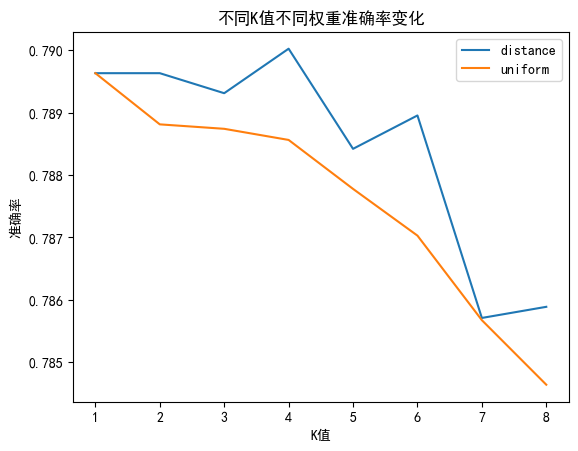

In [15]:
title='不同K值不同权重准确率变化'
xlabel='K值'
ylabel='准确率'
weights = ["distance","uniform"]
neis = [1,2,3,4,5,6,7,8]
for weight in weights:
    accuracy_score_list=[]
    for nei in neis :
        knn = KNeighborsClassifier(weights=weight,n_neighbors=nei)
        knn.fit(X_train_smote,y_train_smote)
        label = knn.predict(X_test_smote)
        acc=accuracy_score(y_test_smote,label)
        accuracy_score_list.append(acc)
    draw(neis,accuracy_score_list,weight,xlabel,ylabel,title)
plt.show()

In [16]:
title='不同K值不同距离准确率变化'
xlabel='K值'
ylabel='准确率'
weights = "distance"
neis = [1,2,3,4,5,6]
ps = [1,2,3]
ps_labels = ['曼哈顿距离','欧式距离','闵可夫斯基距离']
for p in ps:
    accuracy_score_list=[]
    for nei in neis :
        knn = KNeighborsClassifier(weights=weight,n_neighbors=nei,p=p)
        knn.fit(X_train_smote,y_train_smote)
        label = knn.predict(X_test_smote)
        acc=accuracy_score(y_test_smote,label)
        accuracy_score_list.append(acc)
    draw(neis,accuracy_score_list,ps_labels[p-1],xlabel,ylabel,title)
plt.show()